Importing clean data and setting up pandas dataset of event 10

In [1]:
from google.colab import files
uploaded = files.upload()  # file uploaded

Saving event_10.zip to event_10.zip


In [2]:
import zipfile
import pandas as pd

# Path to your zip file
zip_path = "event_10.zip"

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # List and sort the file names
    csv_files = sorted([f for f in z.namelist() if f.endswith('.csv')])

    # Read them in order and collect as DataFrames
    dfs_event_10 = [pd.read_csv(z.open(f)) for f in csv_files]

# Concatenate all DataFrames
event_10 = pd.concat(dfs_event_10, ignore_index=True)
event_10


,evID,timestamp,enHad,enVis,enNeu,muMom,posX,posZ,driftDist,clLength,posY,amplRec
0,1.225400e+10,1.347228e+12,15.9,412.5,15.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,-109.81,574.17,1.82,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-114.01,574.17,1.82,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-286.21,574.28,0.56,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-311.41,574.29,0.81,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,508.53,NaN,NaN,-206.62,48.52
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521.93,NaN,NaN,-204.20,8.71
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.33,NaN,NaN,-201.33,40.87
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,548.73,NaN,NaN,-198.15,39.57


In [3]:
#headers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import hdbscan

/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


nearest neighbor, dbscan, hdbscan , pca function construction

In [4]:
#getting the eps value for dbscan by checking the distance between neighbouring values
def get_nearestneighbor(x,y) :
 k =x
 nbrs = NearestNeighbors(n_neighbors=k).fit(y)
 distances, _ = nbrs.kneighbors()

 distances = np.sort(distances[:, k-1])
 plt.plot(distances)
 plt.ylabel(f'{k}th Nearest Neighbor Distance')
 plt.xlabel('Points sorted by distance')
 plt.show()



In [5]:
def get_hdbscan_clusters(x,y,z):
 clusterer = hdbscan.HDBSCAN(min_cluster_size=x,min_samples=y, metric='euclidean')
 labels = clusterer.fit_predict(z)
 probs  = clusterer.probabilities_
 outlier = clusterer.outlier_scores_

 print("Clusters found (excluding noise):", np.unique(labels))
 print("Noise fraction:", np.mean(labels == -1))
 plt.figure(figsize=(8, 8))
 for cluster in sorted(set(labels)):
    if cluster == -1:
        color = 'gray'
        label_txt = 'Noise'
    else:
        color = plt.get_cmap('tab10')(cluster % 10)
        label_txt = f'Cluster {cluster}'
    idx = (labels == cluster)
    plt.scatter(z[idx, 0], z[idx, 1],
                s=30,
                color=color,
                alpha=np.clip(probs[idx], 0.3, 1.0),
                label=label_txt)

 plt.xlabel('Feature 0')
 plt.ylabel('Feature 1')
 plt.title('HDBSCAN Clustering (Direct 2D)')
 plt.legend()
 plt.grid(True)
 plt.show()
 return labels



In [6]:
def get_dbscan(x,y,z):
  db = DBSCAN(eps=x, min_samples=y)
  labels = db.fit_predict(z)
  print("Clusters found (excluding noise):", np.unique(labels))
  print("Noise fraction:", np.mean(labels == -1))


In [7]:
def get_pca_2d(x,labels):
# PCA for 3D plotting
    X_pca = PCA(n_components=2).fit_transform(x)

  # 2D scatter plot
    plt.figure(figsize=(8, 8))
    for cluster in sorted(set(labels)):
        if cluster == -1:
            color = 'black'
            label = 'Noise'
        else:
            color = plt.get_cmap('tab10')(cluster)
            label = f'Cluster {cluster}'
        idx = labels == cluster
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], color=color, label=label, s=10)

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('2D PCA with Clusters')
    plt.legend(title='Cluster')
    plt.show()



EVENT 10

TOP VIEW

Target tracker

In [8]:
tau_hits = event_10[['posX','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(40, 3)

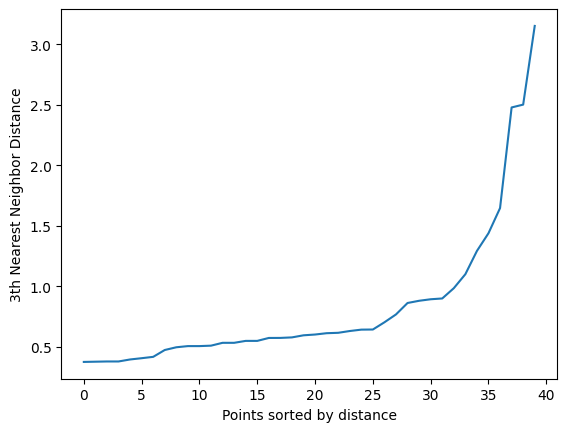

In [9]:
get_nearestneighbor(3,tau_hits_scaled)

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.8


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


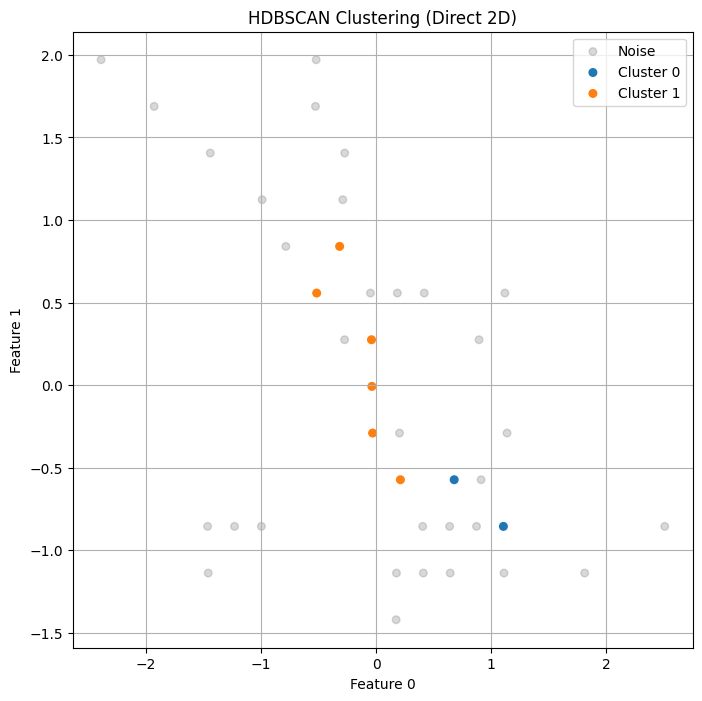

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  1,  0,
       -1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1])

In [10]:
get_hdbscan_clusters(2,4,tau_hits_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.8


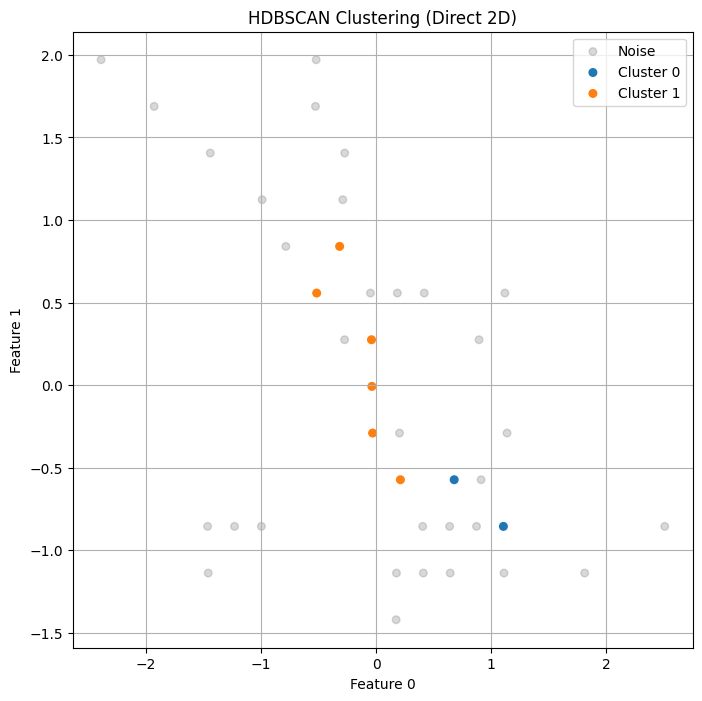

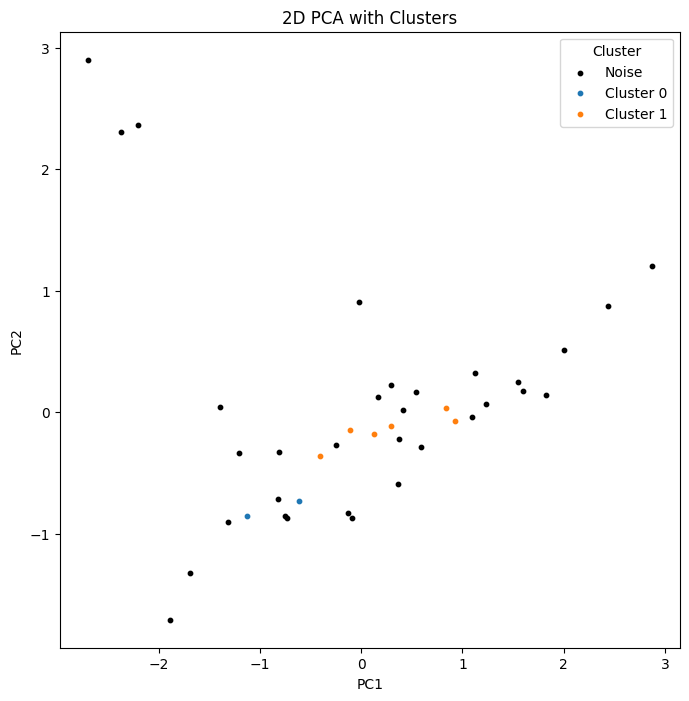

In [11]:
labels = get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

The dataset is clustered based on the spatial distribution of hits, considering both the top view and the side view, after the neutrino interacts with the target and produces a hadronic shower.
The two clusters may correspond to different types of particles, but the electronic detector data alone is insufficient to unambiguously identify the particles or reconstruct their decay paths.

RPC hits

In [12]:
tau_hits = event_10[['posX','posZ', 'clLength']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(7, 3)

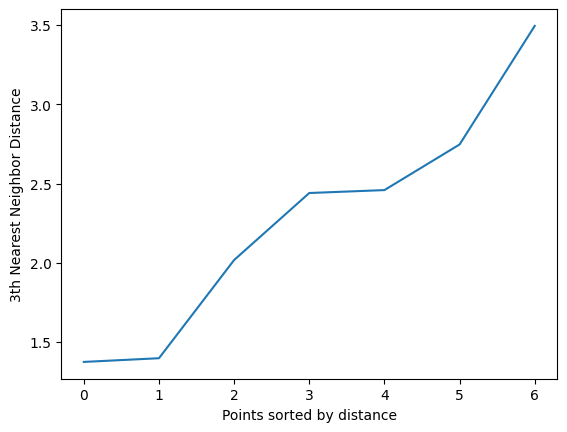

In [13]:
get_nearestneighbor(3,tau_hits_scaled)

Clusters found (excluding noise): [-1]
Noise fraction: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


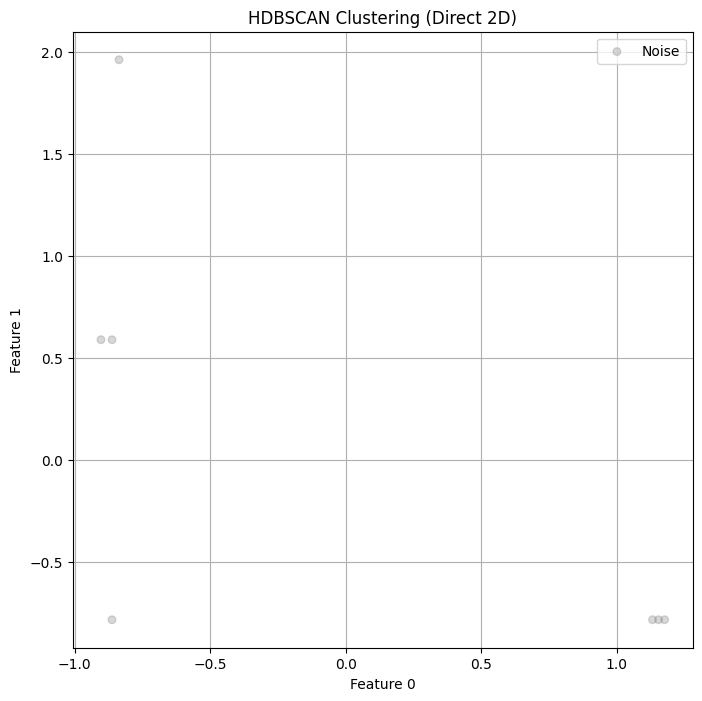

array([-1, -1, -1, -1, -1, -1, -1])

In [14]:
get_hdbscan_clusters(2,4,tau_hits_scaled)

Clusters found (excluding noise): [-1]
Noise fraction: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


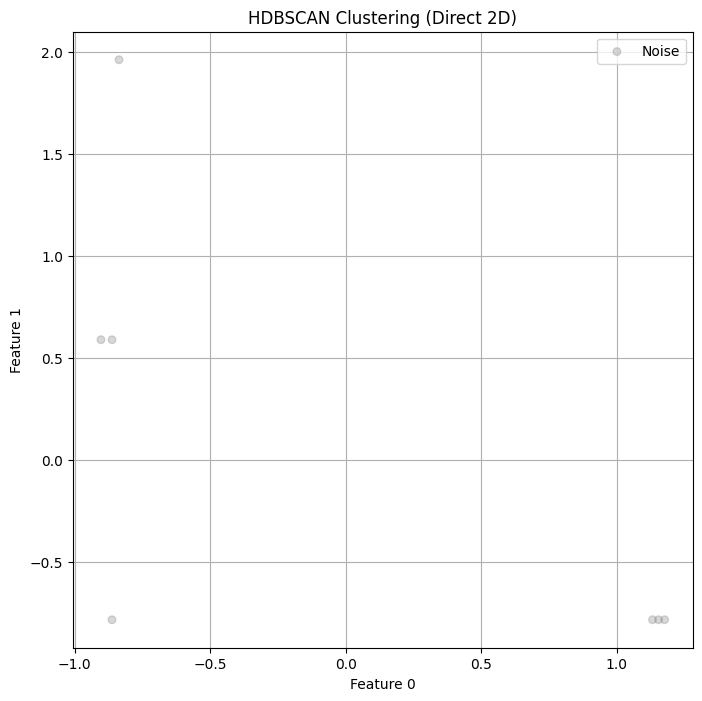

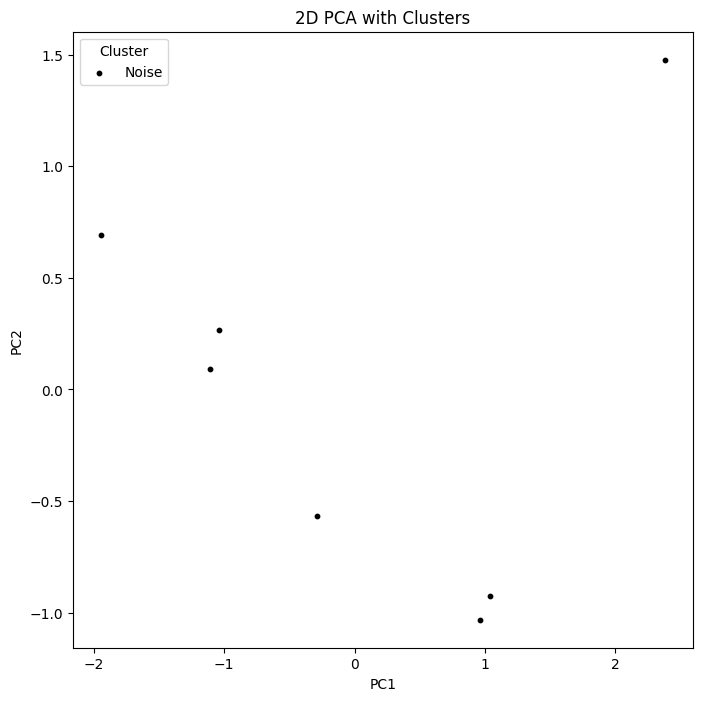

In [15]:
labels = get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

Drift tube hits

In [16]:
tau_hits = event_10[['posX','posZ', 'driftDist']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(51, 3)

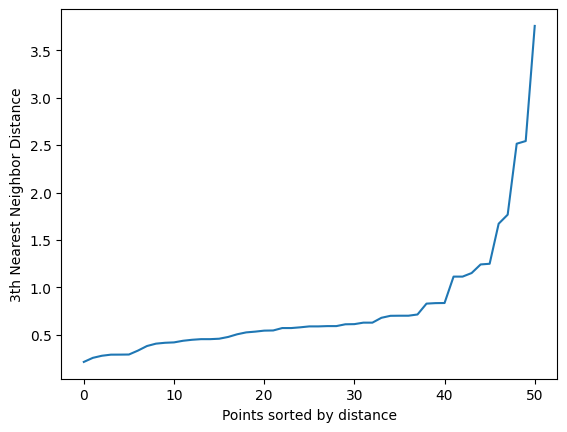

In [17]:
get_nearestneighbor(3,tau_hits_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.0784313725490196


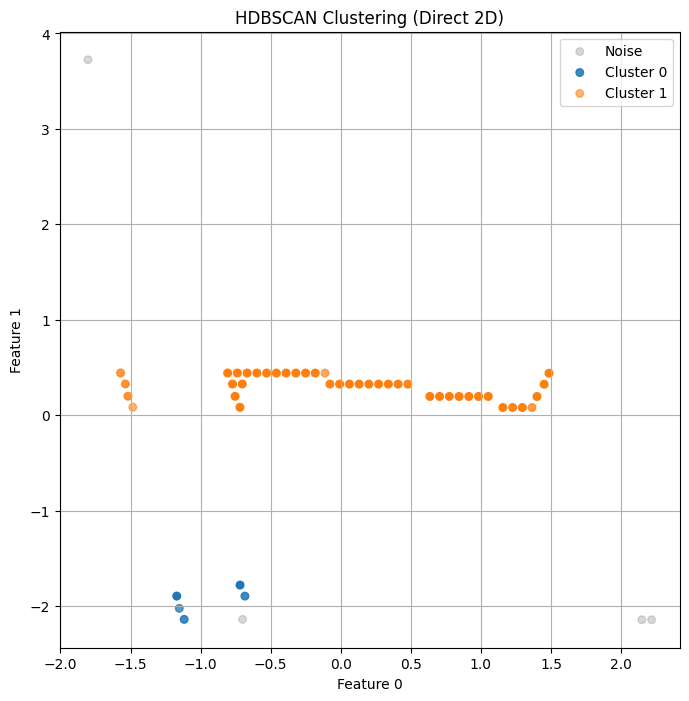

array([-1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [18]:
get_hdbscan_clusters(2,4,tau_hits_scaled)

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.0784313725490196


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


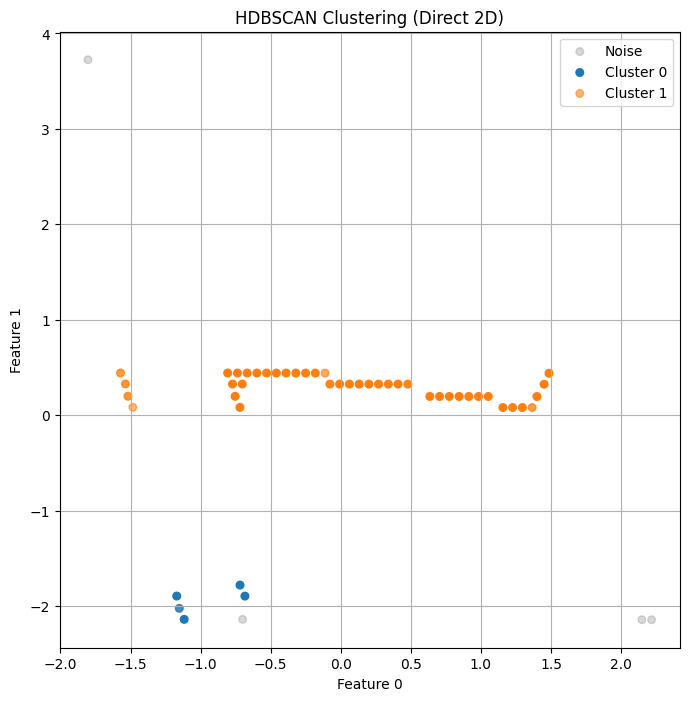

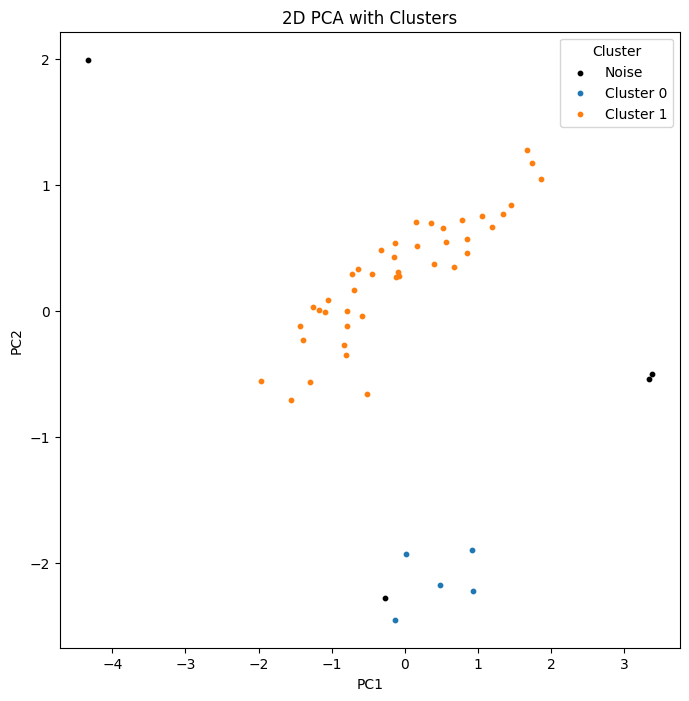

In [19]:
labels = get_hdbscan_clusters(4,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

Muon Bending is observed in the drift tube

SIDE VIEW

Target tracker

In [20]:
tau_hits = event_10[['posY','posZ', 'amplRec']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(39, 3)

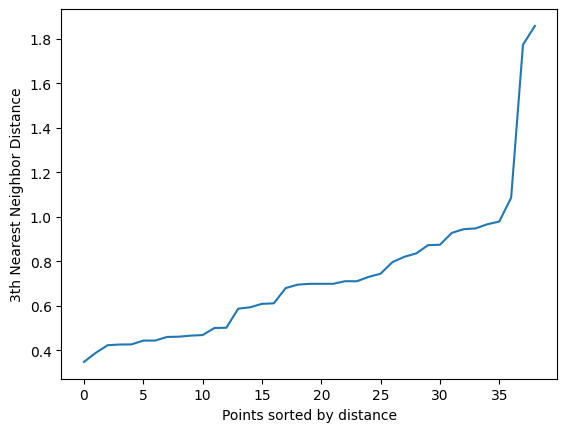

In [21]:
get_nearestneighbor(3,tau_hits_scaled)

Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.07692307692307693


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


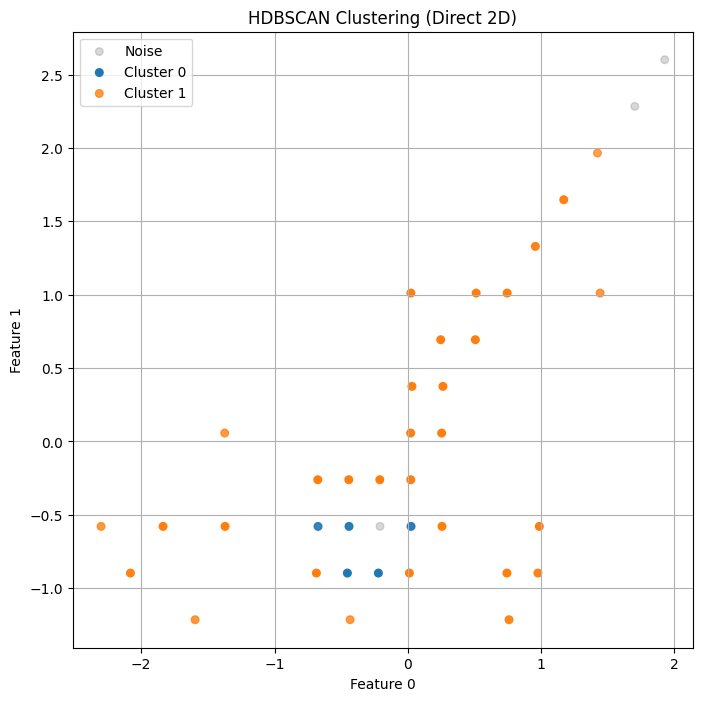

array([ 1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  0,  1,  0,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1])

In [22]:
get_hdbscan_clusters(2,4,tau_hits_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found (excluding noise): [-1  0  1]
Noise fraction: 0.07692307692307693


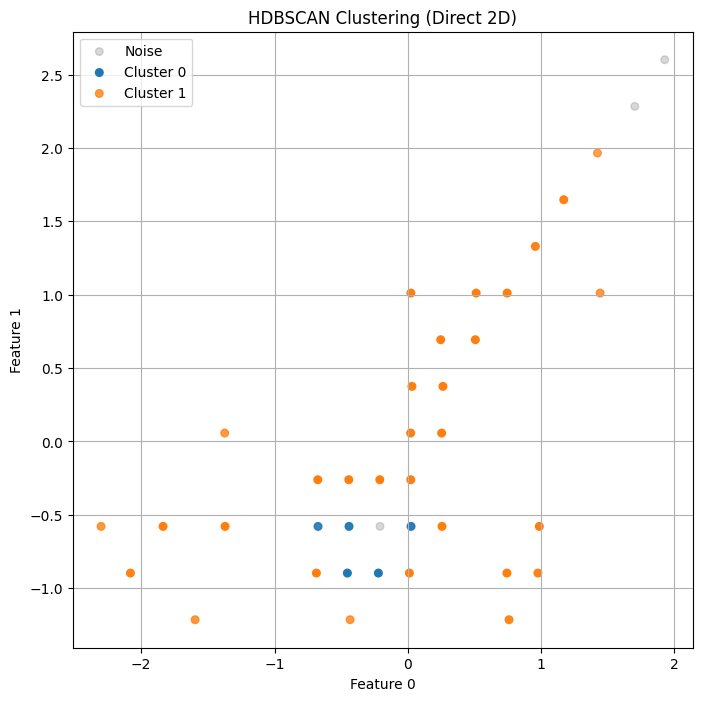

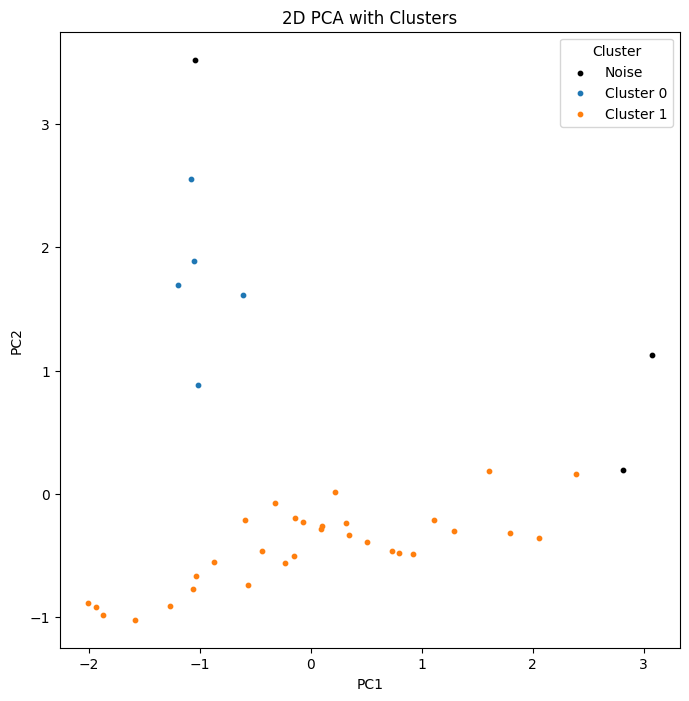

In [23]:
labels = get_hdbscan_clusters(2,4,tau_hits_scaled)
get_pca_2d(tau_hits_scaled, labels)

RPC hits

In [24]:
tau_hits = event_10[['posY','posZ', 'clLength']]
tau_hits= tau_hits.dropna()
tau_hits_scaled = StandardScaler().fit_transform(tau_hits)
tau_hits_scaled.shape

(3, 3)